In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from palettable.cubehelix import Cubehelix
import seaborn as sns
import math

In [3]:
results = pd.read_csv("results.csv")

In [4]:
results

,platform,packet_size,num_requests,time
0,fpga_linux,64,1446694,29.999879
1,fpga_linux,128,1458922,29.999879
2,fpga_linux,192,1449189,29.999872
3,fpga_linux,256,1459537,29.999362
4,fpga_linux,320,1396693,29.999917
5,fpga_linux,384,1352602,29.999840
6,fpga_linux,448,1338806,29.999852
7,fpga_linux,512,1446916,29.999872
8,fpga_linux,768,1090198,29.999875
9,fpga_linux,1024,1086863,29.999811


In [5]:
results["total_bytes"] = results["num_requests"] * results["packet_size"]

In [6]:
results

,platform,packet_size,num_requests,time,total_bytes
0,fpga_linux,64,1446694,29.999879,92588416
1,fpga_linux,128,1458922,29.999879,186742016
2,fpga_linux,192,1449189,29.999872,278244288
3,fpga_linux,256,1459537,29.999362,373641472
4,fpga_linux,320,1396693,29.999917,446941760
5,fpga_linux,384,1352602,29.999840,519399168
6,fpga_linux,448,1338806,29.999852,599785088
7,fpga_linux,512,1446916,29.999872,740820992
8,fpga_linux,768,1090198,29.999875,837272064
9,fpga_linux,1024,1086863,29.999811,1112947712


In [7]:
results["bw_bps"] = (results["total_bytes"]*8)/results["time"]
results["bw_gbps"] = results["bw_bps"]/(10**9)

In [8]:
(29.999879/1446694)*(10**6)

20.736851746119083

In [9]:
results

,platform,packet_size,num_requests,time,total_bytes,bw_bps,bw_gbps
0,fpga_linux,64,1446694,29.999879,92588416,2.469034e+07,0.024690
1,fpga_linux,128,1458922,29.999879,186742016,4.979807e+07,0.049798
2,fpga_linux,192,1449189,29.999872,278244288,7.419879e+07,0.074199
3,fpga_linux,256,1459537,29.999362,373641472,9.963984e+07,0.099640
4,fpga_linux,320,1396693,29.999917,446941760,1.191848e+08,0.119185
5,fpga_linux,384,1352602,29.999840,519399168,1.385072e+08,0.138507
6,fpga_linux,448,1338806,29.999852,599785088,1.599435e+08,0.159943
7,fpga_linux,512,1446916,29.999872,740820992,1.975531e+08,0.197553
8,fpga_linux,768,1090198,29.999875,837272064,2.232735e+08,0.223273
9,fpga_linux,1024,1086863,29.999811,1112947712,2.967879e+08,0.296788


In [10]:
def create_bw_microbench_graph(input_dataframe, platforms, markers, colors, packet_size_ticks):
    fig, ax = plt.subplots()

    subsets = []
    legend_labels = []

    for platform in platforms:
        subset = input_dataframe.loc[input_dataframe.platform.eq(platform)]
        subsets.append(subset)
        legend_labels.append(platform)

    for i in range(0, len(subsets)):
        subsets[i].plot(x="packet_size", y="bw_gbps", logx=True, ax=ax, marker=markers[i], color=[colors[i]], label=platforms[i])
    x_ticks = packet_size_ticks
    x_labels = packet_size_ticks

    ax.set_xlabel("Packet size (bytes, log scale)", fontsize=16)
    ax.set_ylabel("Goodput (Gbps)", fontsize=16)
    plt.xticks(x_ticks, x_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.draw()

    return fig, ax

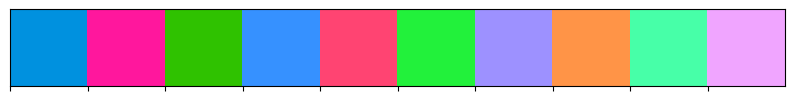

In [11]:
colors = sns.cubehelix_palette(n_colors=10, start=5, rot=8, hue=3, light=0.4, dark=.8)
sns.palplot(colors)

In [12]:
line_colors = [colors[2], colors[3], colors[6], colors[4]]

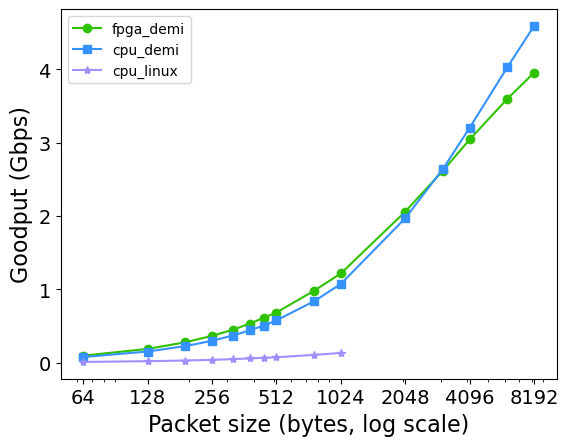

In [13]:
fig,ax = create_bw_microbench_graph(results, ["fpga_demi", "cpu_demi", "cpu_linux"], ["o", "s", "*", "v"], line_colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])